In [500]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-for-bank-customers/churn.csv


In [501]:
df = pd.read_csv("/kaggle/input/churn-for-bank-customers/churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [503]:
df.shape

(10000, 14)

In [504]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [505]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [506]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [507]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

**Data is imbalanced.**

# Visualization

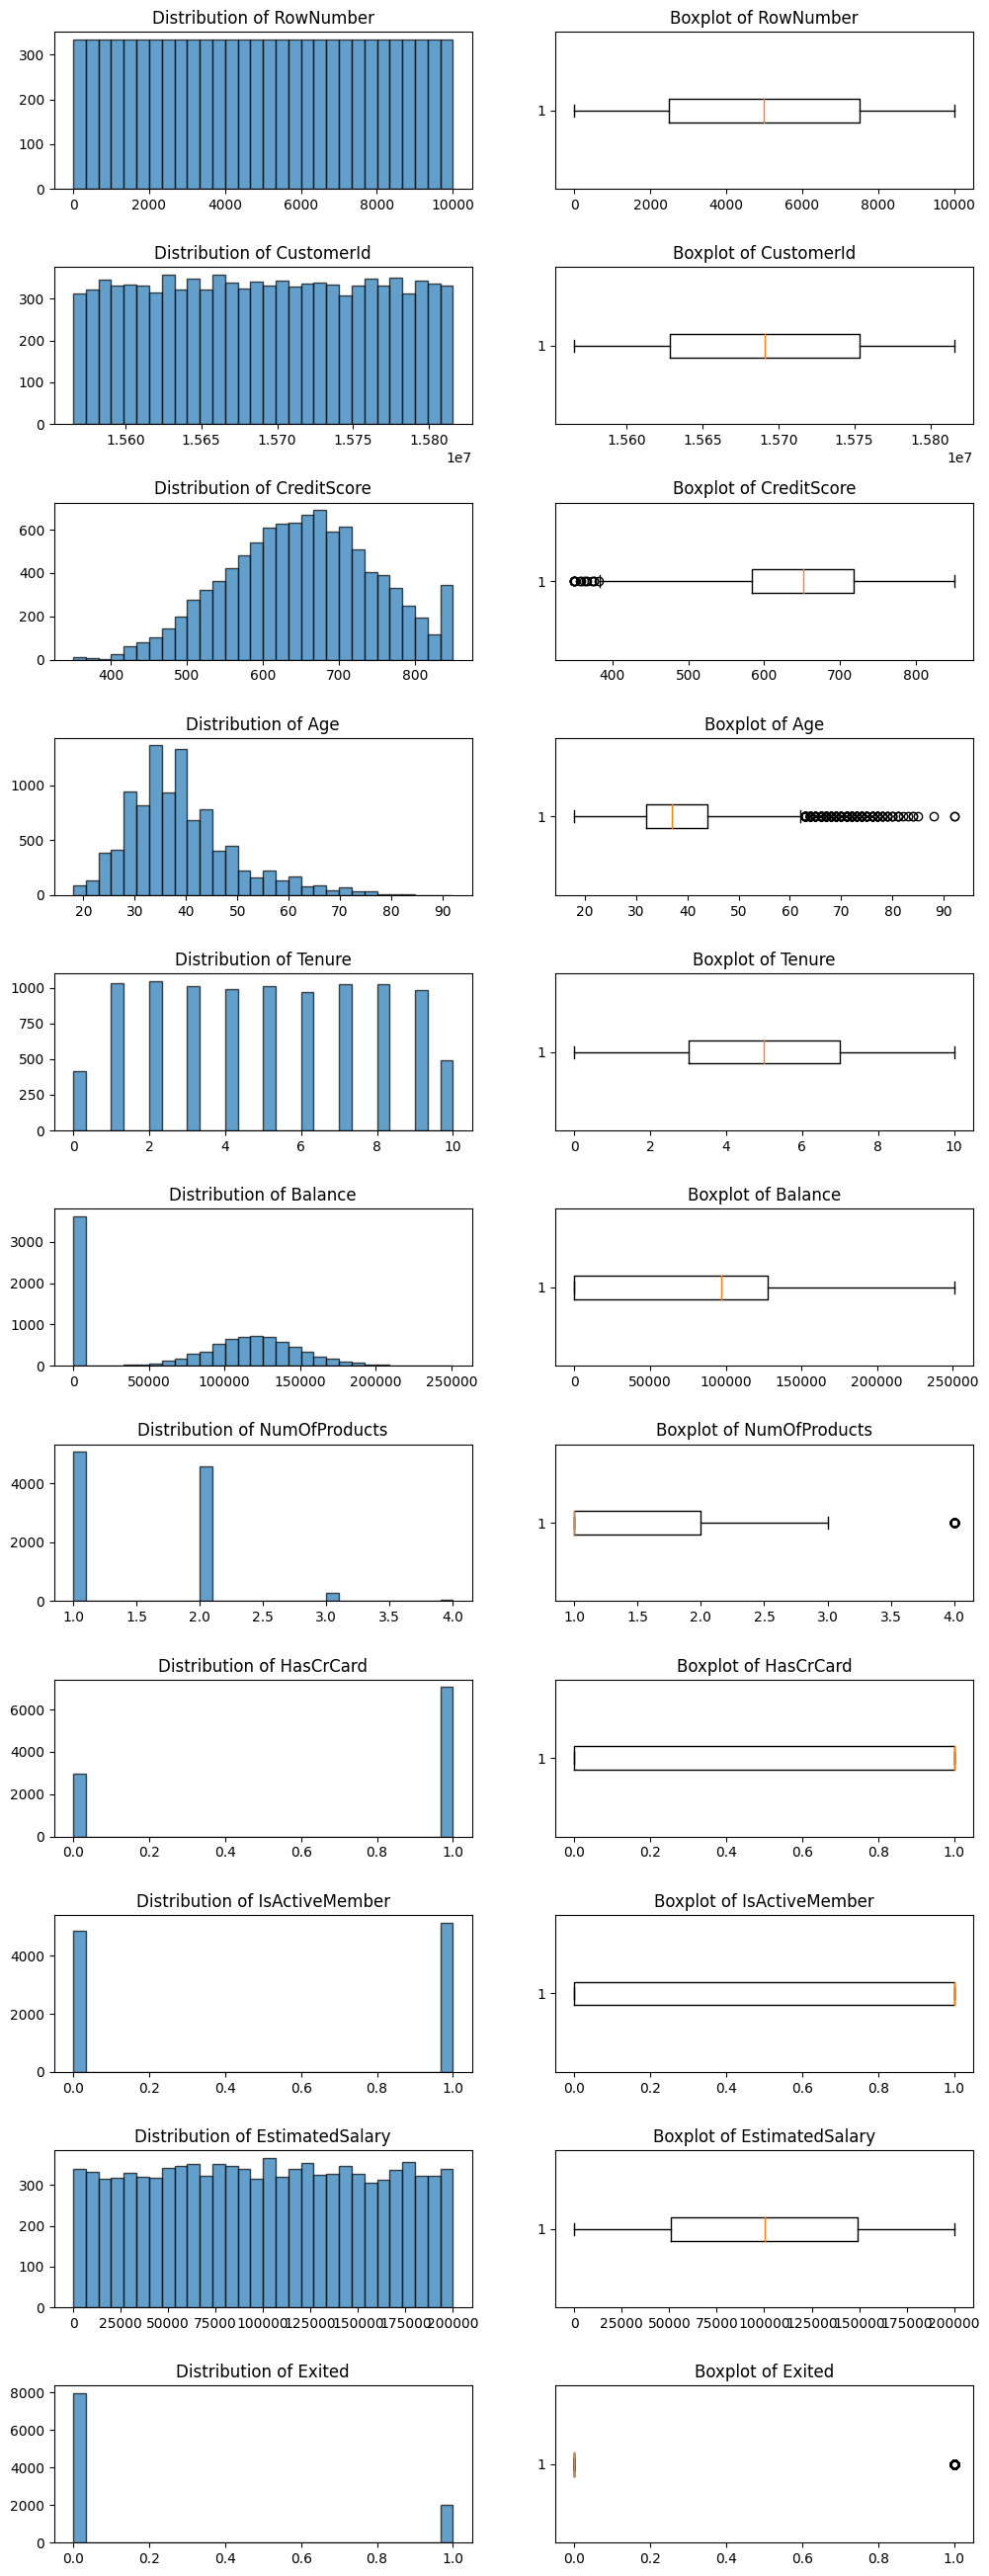

In [508]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(12, 3 * len(numerical_cols)))
fig.subplots_adjust(hspace=0.5)

# Plot the distributions
for i, col in enumerate(numerical_cols):
    # Histogram
    axes[i, 0].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i, 0].set_title(f'Distribution of {col}')

    # Boxplot
    axes[i, 1].boxplot(df[col], vert=False)
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.show()


Distribution of variables is either uniform or Gaussian. There are some outliers.

# Feature Engineering

In [509]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [510]:
df.duplicated().sum()

0

In [511]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [512]:
# drop irrelevant variables
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [513]:
# Split the data first for further preprocessing to avoid data leakage

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Perform one-hot encoding using pd.get_dummies
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Separate features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**SMOTE to handle imbalanced classes**

In [514]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_smote

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,753,57,7,0.000000,1,1,0,159475.080000,False,False,True
1,739,32,3,102128.270000,1,1,0,63981.370000,True,False,True
2,755,37,0,113865.230000,2,1,1,117396.250000,True,False,False
3,561,37,5,0.000000,2,1,0,83093.250000,False,False,True
4,692,49,6,110540.430000,2,0,1,107472.990000,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
12735,691,31,2,208084.467304,1,1,0,133223.179221,False,True,True
12736,793,61,8,123694.287067,2,1,0,173564.659813,False,False,False
12737,483,42,2,0.000000,2,0,0,197599.735633,False,True,True
12738,640,50,6,140760.785548,1,1,0,2838.642122,True,True,True


In [515]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [516]:
y_train_smote.value_counts()

Exited
1    6370
0    6370
Name: count, dtype: int64

**Outlier Handling**

In [517]:
# Combine X_train and y_train
combined_data = np.column_stack((X_train_smote, y_train_smote))

# Convert combined_data to a pandas DataFrame for easier handling
combined_data = pd.DataFrame(combined_data, columns=list(X_train_smote.columns) + ['target'])
combined_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,target
0,753,57,7,0.0,1,1,0,159475.08,False,False,True,1
1,739,32,3,102128.27,1,1,0,63981.37,True,False,True,1
2,755,37,0,113865.23,2,1,1,117396.25,True,False,False,0
3,561,37,5,0.0,2,1,0,83093.25,False,False,True,0
4,692,49,6,110540.43,2,0,1,107472.99,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12735,691,31,2,208084.467304,1,1,0,133223.179221,False,True,True,1
12736,793,61,8,123694.287067,2,1,0,173564.659813,False,False,False,1
12737,483,42,2,0.0,2,0,0,197599.735633,False,True,True,1
12738,640,50,6,140760.785548,1,1,0,2838.642122,True,True,True,1


In [518]:
# List of continuous columns
continuous_columns = ["Balance", "EstimatedSalary"]

# Calculate the first quartile (Q1) and third quartile (Q3) for continuous columns
Q1 = combined_data[continuous_columns].quantile(0.25)
Q3 = combined_data[continuous_columns].quantile(0.75)

# Calculate the IQR for each continuous feature
IQR = Q3 - Q1

# Set a threshold for identifying outliers (commonly 1.5 times the IQR)
threshold = 1.5

# Define a function to filter outliers
def filter_outliers(data):
    is_outlier = (data[continuous_columns] < (Q1 - threshold * IQR)) | (data[continuous_columns] > (Q3 + threshold * IQR))
    outliers_by_column = is_outlier.sum()
    total_outliers = outliers_by_column.sum()
    
    # Print the number of outliers removed from each continuous column
    for column, count in outliers_by_column.items():
        print(f"Number of outliers removed from {column}: {count}")
    
    return data[~is_outlier.any(axis=1)]

# Apply the filter function to remove outliers
cleaned_data = filter_outliers(combined_data)

# Separate X_train_cleaned and y_train_cleaned back
X_train_cleaned = cleaned_data.drop("target", axis=1)
y_train_cleaned = cleaned_data["target"]

# Print the number of outliers removed
print(f"Total number of outliers removed: {len(combined_data) - len(cleaned_data)}")

# Convert X_train_cleaned back to a DataFrame with the same column names
X_train_cleaned = pd.DataFrame(X_train_cleaned, columns=X_train.columns)

Number of outliers removed from Balance: 0
Number of outliers removed from EstimatedSalary: 0
Total number of outliers removed: 0


In [519]:
X_train_cleaned

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,753,57,7,0.0,1,1,0,159475.08,False,False,True
1,739,32,3,102128.27,1,1,0,63981.37,True,False,True
2,755,37,0,113865.23,2,1,1,117396.25,True,False,False
3,561,37,5,0.0,2,1,0,83093.25,False,False,True
4,692,49,6,110540.43,2,0,1,107472.99,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
12735,691,31,2,208084.467304,1,1,0,133223.179221,False,True,True
12736,793,61,8,123694.287067,2,1,0,173564.659813,False,False,False
12737,483,42,2,0.0,2,0,0,197599.735633,False,True,True
12738,640,50,6,140760.785548,1,1,0,2838.642122,True,True,True


In [520]:
y_train_cleaned

0        1
1        1
2        0
3        0
4        0
        ..
12735    1
12736    1
12737    1
12738    1
12739    1
Name: target, Length: 12740, dtype: object

In [521]:
y_train_cleaned.value_counts()

target
1    6370
0    6370
Name: count, dtype: int64

**Standard Scaling**

In [522]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on X_train_cleaned
X_train_cleaned_scaled = scaler.fit_transform(X_train_cleaned)

X_train_cleaned_scaled = pd.DataFrame(X_train_cleaned_scaled, columns=X_train_cleaned.columns)

X_train_cleaned_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1.148037,1.604250,0.786284,-1.342648,-0.729755,0.772328,-0.768965,1.016488,-0.763159,-0.638541,0.813829
1,0.994660,-0.890994,-0.677532,0.327484,-0.729755,0.772328,-0.768965,-0.635349,1.310342,-0.638541,0.813829
2,1.169948,-0.391945,-1.775394,0.519422,1.008341,0.772328,1.300450,0.288614,1.310342,-0.638541,-1.228760
3,-0.955419,-0.391945,0.054376,-1.342648,1.008341,0.772328,-0.768965,-0.304754,-0.763159,-0.638541,0.813829
4,0.479751,0.805772,0.420330,0.465051,1.008341,-1.294786,1.300450,0.116963,1.310342,-0.638541,0.813829
...,...,...,...,...,...,...,...,...,...,...,...
12735,0.468796,-0.990804,-1.043486,2.060216,-0.729755,0.772328,-0.768965,0.562386,-0.763159,1.566070,0.813829
12736,1.586257,2.003489,1.152238,0.680159,1.008341,0.772328,-0.768965,1.260208,-0.763159,-0.638541,-1.228760
12737,-1.809948,0.107104,-1.043486,-1.342648,1.008341,-1.294786,-0.768965,1.675963,-0.763159,1.566070,0.813829
12738,-0.089935,0.905582,0.420330,0.959253,-0.729755,0.772328,-0.768965,-1.692987,1.310342,1.566070,0.813829


In [523]:
# Transform X_test using the scaler fitted on X_train_cleaned
X_test_scaled = scaler.transform(X_test)

# convert it back to a DataFrame with the same column names
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.692487,-0.491755,0.786284,-1.342648,1.008341,0.772328,-0.768965,-0.111194,-0.763159,-0.638541,0.813829
1,-1.349817,-0.791184,-0.311578,0.800020,1.008341,-1.294786,-0.768965,-0.789446,1.310342,-0.638541,0.813829
2,-0.999241,-0.092516,-0.311578,-1.342648,1.008341,-1.294786,1.300450,0.081685,-0.763159,1.566070,-1.228760
3,-0.100890,-0.691375,0.054376,0.936888,1.008341,-1.294786,-0.768965,-1.154826,-0.763159,1.566070,0.813829
4,-0.089935,-0.691375,-0.677532,-0.069924,-0.729755,0.772328,1.300450,1.173376,-0.763159,1.566070,-1.228760
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.282552,-0.491755,-1.043486,1.184354,-0.729755,-1.294786,1.300450,-1.266940,-0.763159,-0.638541,0.813829
1996,-0.155668,-0.391945,-0.677532,0.479643,1.008341,0.772328,1.300450,1.147215,1.310342,-0.638541,0.813829
1997,-1.448417,0.606152,1.518192,0.755457,-0.729755,-1.294786,-0.768965,0.845915,1.310342,-0.638541,-1.228760
1998,0.446885,-0.192326,0.786284,-1.342648,1.008341,-1.294786,-0.768965,-1.484056,-0.763159,-0.638541,0.813829


**Modeling**

In [524]:
# Renaming for easier referencing
X_train = X_train_cleaned_scaled.copy()
X_test = X_test_scaled.copy()
y_train = y_train_cleaned.copy()
y_test = y_test.copy()

In [525]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [526]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Logistic Regression
logistic_params = {'C': [0.001, 0.01, 0.1]}
logistic_model = LogisticRegression()
logistic_grid_search = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy')
logistic_grid_search.fit(X_train, y_train)

logistic_best_model = logistic_grid_search.best_estimator_
logistic_predictions = logistic_best_model.predict(X_test)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Precision:", precision_score(y_test, logistic_predictions))
print("Recall:", recall_score(y_test, logistic_predictions))
print("F1 Score:", f1_score(y_test, logistic_predictions))
print("\nBest Parameters:", logistic_grid_search.best_params_)
print("="*50)

# Random Forest
random_forest_params = {'n_estimators': [50, 100, 500], 'max_depth': [None, 20]}
random_forest_model = RandomForestClassifier()
random_forest_grid_search = GridSearchCV(random_forest_model, random_forest_params, cv=5, scoring='accuracy')
random_forest_grid_search.fit(X_train, y_train)

random_forest_best_model = random_forest_grid_search.best_estimator_
random_forest_predictions = random_forest_best_model.predict(X_test)

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, random_forest_predictions))
print("Precision:", precision_score(y_test, random_forest_predictions))
print("Recall:", recall_score(y_test, random_forest_predictions))
print("F1 Score:", f1_score(y_test, random_forest_predictions))
print("\nBest Parameters:", random_forest_grid_search.best_params_)
print("="*50)

# Support Vector Machine
svm_params = {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}
svm_model = SVC()
svm_grid_search = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

svm_best_model = svm_grid_search.best_estimator_
svm_predictions = svm_best_model.predict(X_test)

print("Support Vector Machine Metrics:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions))
print("Recall:", recall_score(y_test, svm_predictions))
print("F1 Score:", f1_score(y_test, svm_predictions))
print("\nBest Parameters:", svm_grid_search.best_params_)


Logistic Regression Metrics:
Accuracy: 0.7325
Precision: 0.3933333333333333
Recall: 0.5798525798525799
F1 Score: 0.4687189672293942

Best Parameters: {'C': 0.1}
Random Forest Metrics:
Accuracy: 0.8315
Precision: 0.5754310344827587
Recall: 0.6560196560196561
F1 Score: 0.6130884041331803

Best Parameters: {'max_depth': 20, 'n_estimators': 500}
Support Vector Machine Metrics:
Accuracy: 0.8045
Precision: 0.5152091254752852
Recall: 0.6658476658476659
F1 Score: 0.5809217577706324

Best Parameters: {'C': 1, 'kernel': 'rbf'}


In [527]:
# K-Nearest Neighbors
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn_model = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

knn_best_model = knn_grid_search.best_estimator_
knn_predictions = knn_best_model.predict(X_test)

print("K-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Precision:", precision_score(y_test, knn_predictions))
print("Recall:", recall_score(y_test, knn_predictions))
print("F1 Score:", f1_score(y_test, knn_predictions))
print("\nBest Parameters:", knn_grid_search.best_params_)
print("="*50)

# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test)

print("Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(y_test, naive_bayes_predictions))
print("Precision:", precision_score(y_test, naive_bayes_predictions))
print("Recall:", recall_score(y_test, naive_bayes_predictions))
print("F1 Score:", f1_score(y_test, naive_bayes_predictions))
print("="*50)

# Decision Tree
decision_tree_params = {'max_depth': [None, 10, 20, 30]}
decision_tree_model = DecisionTreeClassifier()
decision_tree_grid_search = GridSearchCV(decision_tree_model, decision_tree_params, cv=5, scoring='accuracy')
decision_tree_grid_search.fit(X_train, y_train)

decision_tree_best_model = decision_tree_grid_search.best_estimator_
decision_tree_predictions = decision_tree_best_model.predict(X_test)

print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, decision_tree_predictions))
print("Precision:", precision_score(y_test, decision_tree_predictions))
print("Recall:", recall_score(y_test, decision_tree_predictions))
print("F1 Score:", f1_score(y_test, decision_tree_predictions))
print("\nBest Parameters:", decision_tree_grid_search.best_params_)
print("="*50)

# Gradient Boosting
gradient_boosting_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_grid_search = GridSearchCV(gradient_boosting_model, gradient_boosting_params, cv=5, scoring='accuracy')
gradient_boosting_grid_search.fit(X_train, y_train)

gradient_boosting_best_model = gradient_boosting_grid_search.best_estimator_
gradient_boosting_predictions = gradient_boosting_best_model.predict(X_test)

print("Gradient Boosting Metrics:")
print("Accuracy:", accuracy_score(y_test, gradient_boosting_predictions))
print("Precision:", precision_score(y_test, gradient_boosting_predictions))
print("Recall:", recall_score(y_test, gradient_boosting_predictions))
print("F1 Score:", f1_score(y_test, gradient_boosting_predictions))
print("\nBest Parameters:", gradient_boosting_grid_search.best_params_)
print("="*50)

K-Nearest Neighbors Metrics:
Accuracy: 0.7635
Precision: 0.4416961130742049
Recall: 0.6142506142506142
F1 Score: 0.513874614594039

Best Parameters: {'n_neighbors': 3}
Naive Bayes Metrics:
Accuracy: 0.739
Precision: 0.4040066777963272
Recall: 0.5945945945945946
F1 Score: 0.48111332007952284
Decision Tree Metrics:
Accuracy: 0.7835
Precision: 0.47703180212014135
Recall: 0.6633906633906634
F1 Score: 0.5549845837615622

Best Parameters: {'max_depth': 10}
Gradient Boosting Metrics:
Accuracy: 0.8195
Precision: 0.546
Recall: 0.6707616707616708
F1 Score: 0.6019845644983463

Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}


**Gradient Boosting is the Best model.
Performance Metrics of Gradient Boosting:**

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1593
           1       0.55      0.67      0.60       407

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000

ROC-AUC Score: 0.7641316200638235


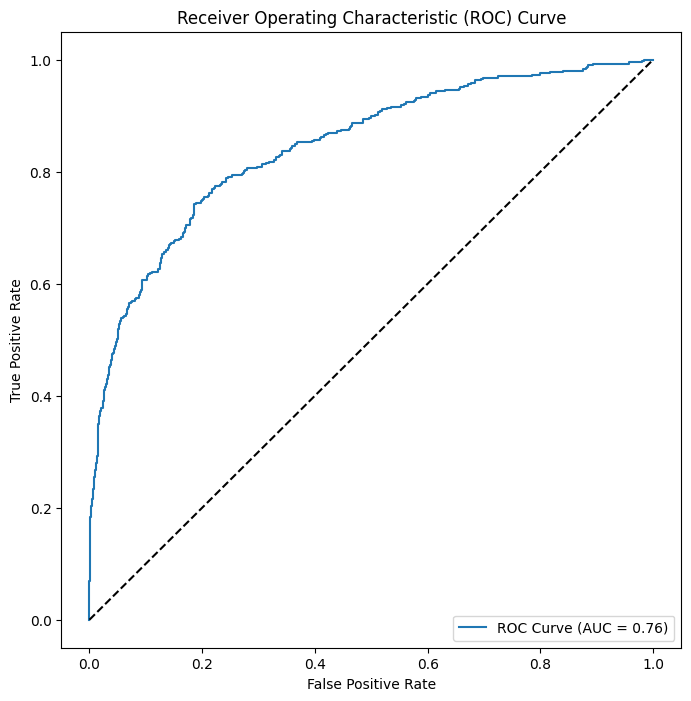

In [528]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Print classification report
classification_rep = classification_report(y_test, gradient_boosting_predictions)
print("Classification Report:\n", classification_rep)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, gradient_boosting_predictions)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gradient_boosting_best_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Export model using Pickle for Deployment**

In [529]:
import pickle

# Dump the model to a file
model_filename = 'gradient_boosting_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(gradient_boosting_best_model, file)

print(f"Gradient Boosting model saved to {model_filename}")

Gradient Boosting model saved to gradient_boosting_model.pkl
